In [1]:
#Importing the necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy
from Potato import plotparams
from astropy import units as u
from astropy.coordinates import SkyCoord
#End of Importing

In [2]:
#This is where the asassnid goes
id = 231929175915

ra_val = 269.0079973

dec_val = 1.52628966

In [3]:
def read_lightcurve(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: 
        asas_sn_id: the asassn id of the desired star
        guide: the path to the data file of the desired star

    Output: 
        dfv: This is the dataframe for the V-band data of the star
        dfg: This is the dataframe for the g-band data of the star
    
    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto 
    a data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the
    Photo filter column data has a value of one, its row is sorted into the data frame corresponding to the V-band. If the Photo
    filter column data has a value of zero, it gets sorted into the data frame corresponding to the g-band.
    """
    fname = os.path.join(guide, str(asas_sn_id)+'.dat')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_fwf(fname, header=None)
    fdata.columns = ["JD", "Mag", "Mag_err", "Quality", "Cam_number", "Phot_filter", "Camera"] #These are the columns of data

    dfv = fdata.loc[fdata["Phot_filter"] == 1].reset_index(drop=True) #This sorts the data into the V-band
    dfg = fdata.loc[fdata["Phot_filter"] == 0].reset_index(drop=True) #This sorts the data into the g-band

    return dfv, dfg

In [4]:
def read_lightcurve_csv(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: asas_sn_id of desired star

    Output: Two dataframes. One contains the V-band data for the star and the other contains the g-band data for the star.

    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto a
    data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the Photo 
    filter column data has a value of one, its row is sorted into the dataframe corresponding to the V-band. If the Photo filter column 
    data has a value of zero, it gets sorted into the dataframe corresponding to the g-band.
    """
    
    fname = os.path.join(guide, str(asas_sn_id)+'-light-curves.csv')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_csv(fname, header=None)
    fdata.columns = ["JD", "Flux", "Flux Error", "Mag", "Mag Error", "Limit", "FWHM", "Filter", "Quality", "Camera"]

    dfv = fdata.loc[fdata["Filter"] == 'V'].reset_index(drop=True)
    dfg = fdata.loc[fdata["Filter"] == 'g'].reset_index(drop=True)

    return dfv, dfg
#End of read_lightcurve_csv function

In [5]:
dfv, dfg = read_lightcurve_csv(id, 'Research/ASASSN_LC_Data/')

dfg['Mag'] = [float(i) for i in dfg['Mag']]

#dfg = dfg.loc[dfg['Mag'] < 14].reset_index(drop=True)

mag = [float(i) for i in dfg['Mag']]

jd = [float(i) for i in dfg['JD']]

meanmag = sum(mag) / len(mag)

dfg_mag_avg = [i - meanmag for i in mag]

peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=2) 

peak = peaks[0]

prop = peaks[1]

length = len(peak)

peak = [int(i) for i in peak]

peak = pd.Series(peak)

print(meanmag)

14.536347276940896


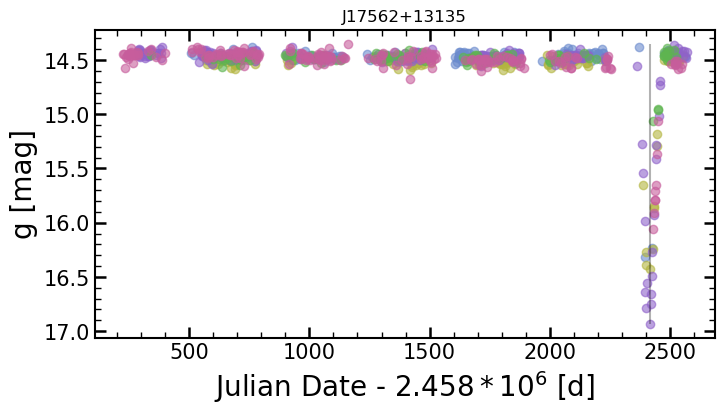

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title('J17562+13135')

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

for i in range(len(peak)):
    ax.vlines((jd[peak[i]] - (2.458 * 10**6)), min(mag), max(mag), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2.458*10^{6}$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

fig, ax = plt.subplots((length+1),1, figsize=(12,6))    

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
#camdf = pd.DataFrame()    

for h in range(0,len(ax.flat)):
    for i in range(0,camnum):
        camdf = dfg.loc[cams == camtype[i]].reset_index(drop=True)
        for j in range(0,len(camdf)):
            camjd = [float(i) for i in camdf["JD"]]
            cammag = [float(i) for i in camdf['Mag']]
            ax[h].scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)
    ax[h].invert_yaxis()
    
for q in range(0,len(ax.flat)-1):
    ax[0].vlines((jd[peak[q]] - (2.458 * 10**6)), min(mag), max(mag), "k", alpha=0.3)
        
ax[0].set(title=id)
    
meanjd = sum(jd) / len(jd)

for t in range(1,len(ax.flat)):
    ax[t].set_xlim(left= ((jd[peak[t-1]]-(2.458*10**6)) - (0.05 * (meanjd-(2.458*10**6))) + 0), 
                    right = ((jd[peak[t-1]]-(2.458*10**6)) + (0.05 * (meanjd-(2.458*10**6))) - 0))

for g in ax.flat:
    g.set(xlabel='Julian Date - 2.458e6', ylabel = 'Magnitude')   

print(len(peak))
print(dfg["Mag"][peak])

In [7]:
mag = [float(i) for i in dfg['Mag']]

dfg['JD'] = [float(i) for i in dfg['JD']]
dfg['Mag'] = [float(i) for i in dfg['Mag']]

standard = np.std(mag)
print(standard)

0.31058446083630603


In [8]:
avg = np.mean(mag)
print(avg)

14.536347276940905


In [9]:
dip_dfg = dfg.loc[dfg['JD'] >= 1700 + (2.458 * 10 **6)].reset_index(drop=True)
dip_dfg = dip_dfg.loc[dip_dfg['Mag'] > 13.8].reset_index(drop=True)
dip_dfg.head(10)
print(dip_dfg['JD'])

0      2.459700e+06
1      2.459703e+06
2      2.459705e+06
3      2.459705e+06
4      2.459707e+06
           ...     
337    2.460557e+06
338    2.460561e+06
339    2.460564e+06
340    2.460568e+06
341    2.460569e+06
Name: JD, Length: 342, dtype: float64


In [10]:
nodip_dfg = dfg.loc[dfg['JD'] < 1460 + (2.458 * 10 **6)].reset_index(drop=True)
print(np.mean(nodip_dfg['Mag']))

14.470288963963961


In [11]:
c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')

In [12]:
c.ra.hms

hms_tuple(h=17.0, m=56.0, s=1.9193520000109743)

In [13]:
c.dec.dms

dms_tuple(d=1.0, m=31.0, s=34.642776000000026)